In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import sklearn.linear_model

## Download dataset

In [4]:
oecd_bli = pd.read_csv ( "datasets/lifesat/oecd_bli_2015.csv" , thousands = ',' ) 
gdp_per_capita = pd.read_csv("datasets/lifesat/gdp_per_capita.csv" , thousands = ',' , delimiter = '\t' , encoding = 'latin1' , na_values = "n/a" )

## Function to prepare country stats

In [6]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [7]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_ [country_stats["Life satisfaction"]]

## Visualize the data

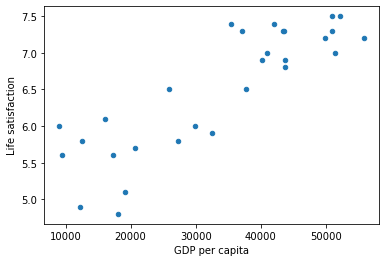

[[5.96242338]]


In [8]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()



## Trying out Linear Model

In [14]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.96242338]]


## trying out k-Nearest Neighbors

In [11]:
import sklearn.neighbors
model_knn = sklearn.neighbors.KNeighborsRegressor ( n_neighbors = 3 )
# Train the model
model_knn.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model_knn.predict(X_new)) # outputs [[ 5.96242338]]

[[5.76666667]]


### Question Answers After Exercise

#### 1. How would you define Machine Learning?

Machine Learning can be defined as improving on task t given a performace p

#### 2. Can you name four types of problems where it shines?

Good for complex problems with 
- No algorithmic solution
- lot of hard tuning
- Fluctiuating environment
- data mining to find patterns 

#### 3.What is a labeled training set?

which has predicted value of class

#### 4.What are the two most common supervised tasks?

- classification
- regresssion

#### 5. Can you name four common unsupervised tasks?

- clustering
- aggregation
- 

#### 6. What type of Machine Learning algorithm would you use to allow a robot to walk in various unknown terrains?

reinforcement learning

#### 7. What type of algorithm would you use to segment your customers into multiple groups?

clustering - KMeans

#### 8. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?

supervised

#### 9. What is an online learning system?

Learn continuosly with stream of data

#### 10. What is out-of-core learning?

#### 11. What type of learning algorithm relies on a similarity measure to make predictions?

#### 12. What is the difference between a model parameter and a learning algorithm’s hyperparameter?

#### 13. What do model-based learning algorithms search for? What is the most common strategy they use to succeed? How do they make predictions?

#### 14. Can you name four of the main challenges in Machine Learning?

#### 15. If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?

#### 16. What is a test set, and why would you want to use it?

#### 17. What is the purpose of a validation set?

#### 18. What is the train-dev set, when do you need it, and how do you use it?

#### 19. What can go wrong if you tune hyperparameters using the test set?